# Devoir 7
**Raphaël Blaude - 55112200**

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from pymatgen.io.cif import CifParser
from pymatgen.ext.matproj import MPRester

import matplotlib.pyplot as plt

In [2]:
mp_key = "NKfarLsNHvBTHM4FxxhUlnMjaXDHo7fy"
mp_id = "mp-22473"

In [3]:
with MPRester(mp_key) as m:
    primitive_structure = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conventionnelle_structure = SpacegroupAnalyzer(primitive_structure).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conventionnelle_structure).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bande interdite

In [54]:
# Bande interdite

data = BSPlotter(el_bs).bs_plot_data()
bs_plot = get_plot_bs(el_bs, plot_range=[-5,5])
bs_plot.show()

if el_bs.get_band_gap()['direct'] == True: type_bande = 'directe'
else: type_bande = 'indirecte'
print(f"Bande interdite de type {type_bande}. ")
print(f"Largeur de la bande interdite: {el_bs.get_band_gap()['energy']} [eV]")
print(f"Maximum de la bande de valence en {data['vbm'][0]}.")
print(f"Minima de la bande de conduction en {data['cbm'][0]} et {data['cbm'][1]}.")

Bande interdite de type indirecte. 
Largeur de la bande interdite: 1.0191999999999997 [eV]
Maximum de la bande de valence en (5.273960050487638, 0.0).
Minima de la bande de conduction en (0.0, 1.0191999999999997) et (2.9118298808463448, 1.0191999999999997).


La bande interdite est située entre les bandes 16 et 17. La largeur de la bande interdite correspond bien à ce que l'on voit sur le graphe, elle est de 1.092 eV. La bande interdite est de type indirect car le maximum de la bande de valence n'est pas en la même abscisse que le minimum de la bande de conduction.

## Directions de dispersion

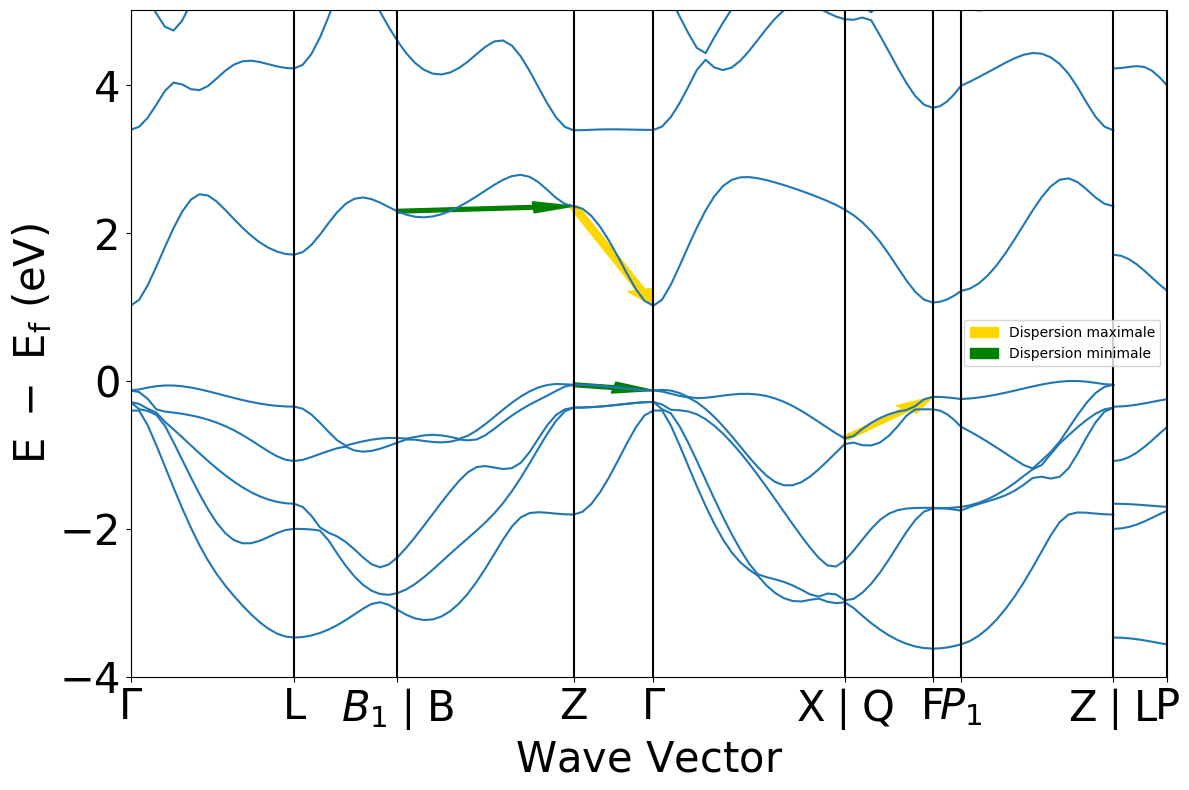

In [56]:
#print(data['energy']['1'])

distance = data['distances']
energy    = data['energy']['1']

dispersion_max_cond, i_max_cond =  0     , 0
dispersion_min_cond, i_min_cond =  np.inf, 0

dispersion_max_val, i_max_val =  0     , 0
dispersion_min_val, i_min_val =  np.inf, 0


for i in range(len(distance)) : 
    idist_cond = len(distance[i]) - 1
    iener_cond = len(energy[i][16]) - 1
    
    idist_val = len(distance[i]) - 1
    iener_val = len(energy[i][15]) - 1
 
    pente_cond = (energy[i][16][iener_cond] - energy[i][16][0]) / (distance[i][idist_cond] - distance[i][0])
    pente_val  = (energy[i][15][iener_val ] - energy[i][15][0]) / (distance[i][idist_val ] - distance[i][0])
    
    if abs(dispersion_min_cond) > abs(pente_cond): 
        dispersion_min_cond = pente_cond
        i_min_cond = i
    if abs(dispersion_max_cond) < abs(pente_cond): 
        dispersion_max_cond = pente_cond
        i_max_cond = i
    
    
    if abs(dispersion_min_val) > abs(pente_val): 
        dispersion_min_val = pente_val
        i_min_val = i
    if abs(dispersion_max_val) < abs(pente_val): 
        dispersion_max_val = pente_val
        i_max_val = i

# Graphe des dispersions

BSPlotter(el_bs).get_plot()

# Bande de conduction

arrow1_y1 = distance[i_max_cond][len(distance[i_max_cond]) - 1] - distance[i_max_cond][0]
arrow1_y2 = energy[i_max_cond][16][len(energy[i_max_cond][16]) - 1] - energy[i_max_cond][16][0]
plt.arrow(distance[i_max_cond][0], energy[i_max_cond][16][0], arrow1_y1, arrow1_y2, color='gold', width=0.05, length_includes_head=True)

arrow1_y1 = distance[i_min_cond][len(distance[i_min_cond]) - 1] - distance[i_min_cond][0]
arrow1_y2 = energy[i_min_cond][16][len(energy[i_min_cond][15]) - 1] - energy[i_min_cond][16][0]
plt.arrow(distance[i_min_cond][0], energy[i_min_cond][16][0], arrow1_y1, arrow1_y2, color='green', width=0.05, length_includes_head=True)


# Bande de valence

arrow1_y1 = distance[i_max_val][len(distance[i_max_val]) - 1] - distance[i_max_val][0]
arrow1_y2 = energy[i_max_val][15][len(energy[i_max_val][15]) - 1] - energy[i_max_val][15][0]
plt.arrow(distance[i_max_val][0], energy[i_max_val][15][0], arrow1_y1, arrow1_y2, color='gold', width=0.05, length_includes_head=True, label="Dispersion maximale")

arrow1_y1 = distance[i_min_val][len(distance[i_min_val]) - 1] - distance[i_min_val][0]
arrow1_y2 = energy[i_min_val][15][len(energy[i_min_val][15]) - 1] - energy[i_min_val][15][0]
plt.arrow(distance[i_min_val][0], energy[i_min_val][15][0], arrow1_y1, arrow1_y2, color='green', width=0.05, length_includes_head=True, label="Dispersion minimale")


plt.legend()
plt.show()


Pour une bande électronique, la dispersion est égale à la variation de l'énergie des électrons en fonction de leur vecteur d'onde. On prend cette dispersion en valeur absolue pour trouver la dispersion maximale et minimale. Pour trouver la dispersion sur python. On calcule la pente entre les points d'une bande électronique.

## Masse effective

Pour la dernière bande de valence: 
[2.86240166 2.91182988 2.91182988 2.96027476 3.00871965]
[1.0838 1.0192 2.3657 2.3322 2.2359]


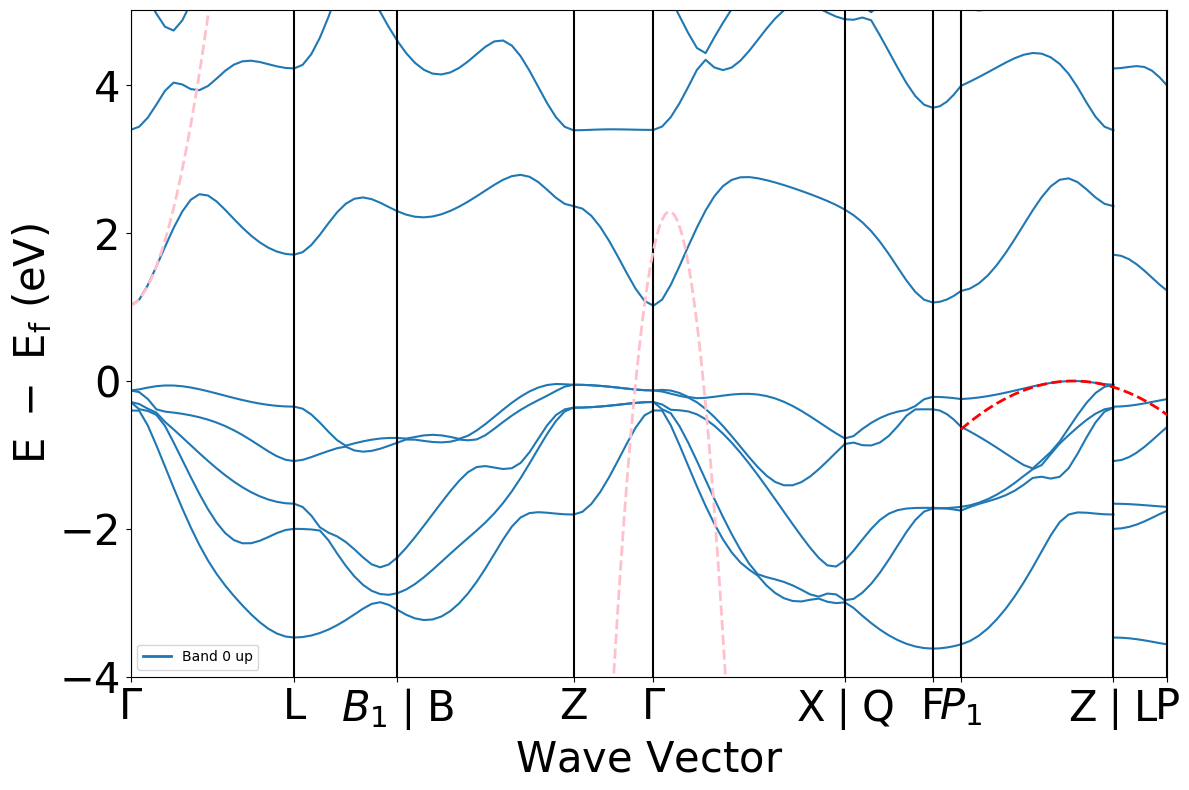

In [89]:
print("Pour la dernière bande de valence: ")
distance = data['distances']
energy   = data['energy']['1']
h_barre = 1.0545718*10**-34

# Pour la bande de valence

X_Y_sommet_index_val = list(distance[7]).index(5.273960050487638)
X_to_fit_val = distance[7][X_Y_sommet_index_val - 2 : X_Y_sommet_index_val + 3]
Y_to_fit_val = energy  [7][15][X_Y_sommet_index_val - 2 : X_Y_sommet_index_val + 3]

# Pour la bande de conduction, il y en a 2 !

X_Y_sommet_index_cond_1 = list(distance[0]).index(0.0)
X_to_fit_cond_1 = distance[0][X_Y_sommet_index_cond_1 : X_Y_sommet_index_cond_1 + 4]
Y_to_fit_cond_1 = energy  [0][16][X_Y_sommet_index_cond_1 : X_Y_sommet_index_cond_1 + 4]

# A cheval entre deux tableaux
X_to_fit_cond_2 = np.concatenate((distance[3][len(distance[3]) - 2 :], distance[4][: 3]), axis=0)
Y_to_fit_cond_2 = np.concatenate((energy[3][16][len(energy[3][16]) - 2 :], energy[3][16][:3]), axis=0)
print(X_to_fit_cond_2)
print(Y_to_fit_cond_2)

BSPlotter(el_bs).get_plot()
val_x_plot   = np.linspace(distance[7][0], distance[8][-1], 1000)
con_x_plot_1 = np.linspace(0, distance[2][-1], 1000)
con_x_plot_2 = np.linspace(distance[3][0], distance[4][-1], 1000)

plt.plot(val_x_plot, np.polyval(np.polyfit(X_to_fit_val, Y_to_fit_val, 2), val_x_plot), ls='--', c='r', lw=2)
plt.plot(con_x_plot_1, np.polyval(np.polyfit(X_to_fit_cond_1, Y_to_fit_cond_1, 2), con_x_plot_1), ls='--', c='pink', lw=2)
plt.plot(con_x_plot_2, np.polyval(np.polyfit(X_to_fit_cond_2, Y_to_fit_cond_2, 2), con_x_plot_2), ls='--', c='pink', lw=2)

plt.show()